<a href="https://colab.research.google.com/github/IrynaBarnych/AI5/blob/hw-%D0%B2%D0%B8%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D0%B0-%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0/module2/%D0%94%D0%97_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів та даних

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/ship_passengers.csv",
                 index_col="Unnamed: 0")

In [35]:
df

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


# Завдання
Проведіть аналіз даних пасажирів. Включіть

* аналіз числових ознак
* аналіз категоріальних ознак
* перевірку викидів

В результаті як коментар опишіть дані(що на що впливає\не впливає і як, можливо якихось даних надто мало і потрібно більше даних, тощо)

In [36]:
mapping = {1: "перший", 2: "другий", 3: "третій"}

df['pclass'] = df['pclass'].replace(mapping)

In [37]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,третій,male,22.0,1,0,7.2500,S
1,перший,female,38.0,1,0,71.2833,C
2,третій,female,26.0,0,0,7.9250,S
3,перший,female,35.0,1,0,53.1000,S
4,третій,male,35.0,0,0,8.0500,S


In [38]:
df["fare"].nunique()

248

In [39]:
df.shape

(891, 7)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    object 
 1   sex       891 non-null    object 
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 55.7+ KB


In [41]:
df.describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


<Axes: >

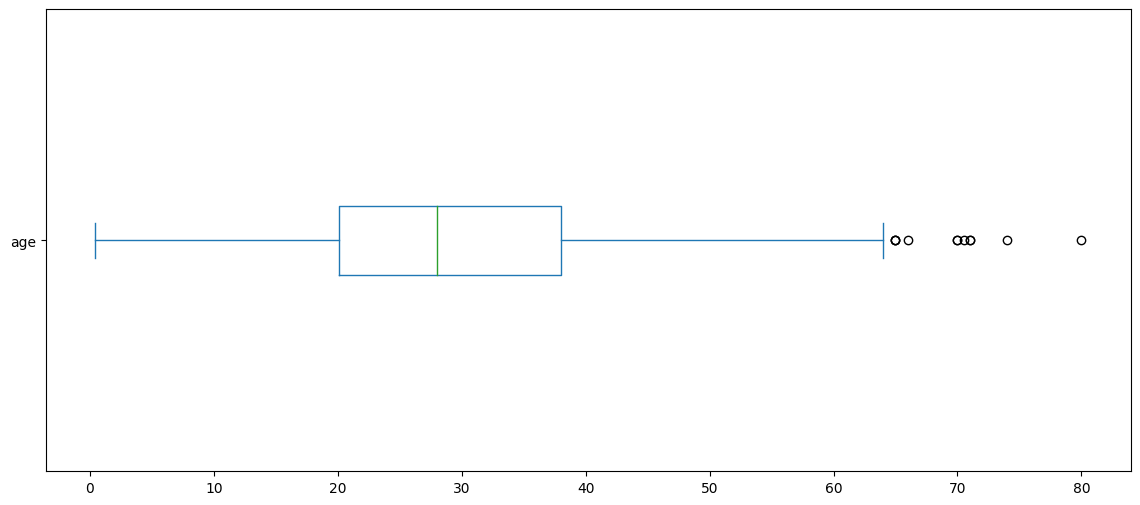

In [42]:
df['age'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

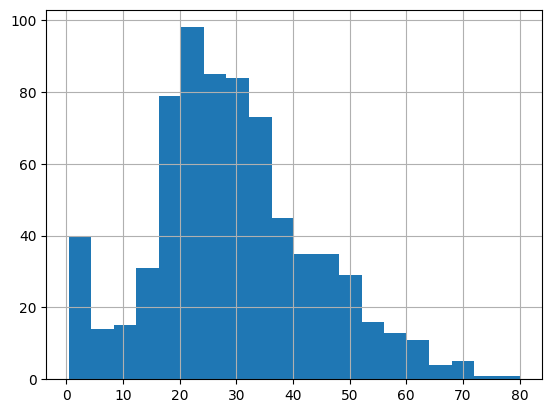

In [43]:
df['age'].hist(bins=20)

In [44]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

In [45]:
for column_name in df.columns:
  if df.dtypes[column_name] == 'object':
    continue

  df = remove_outliers(df, column_name)

<Axes: >

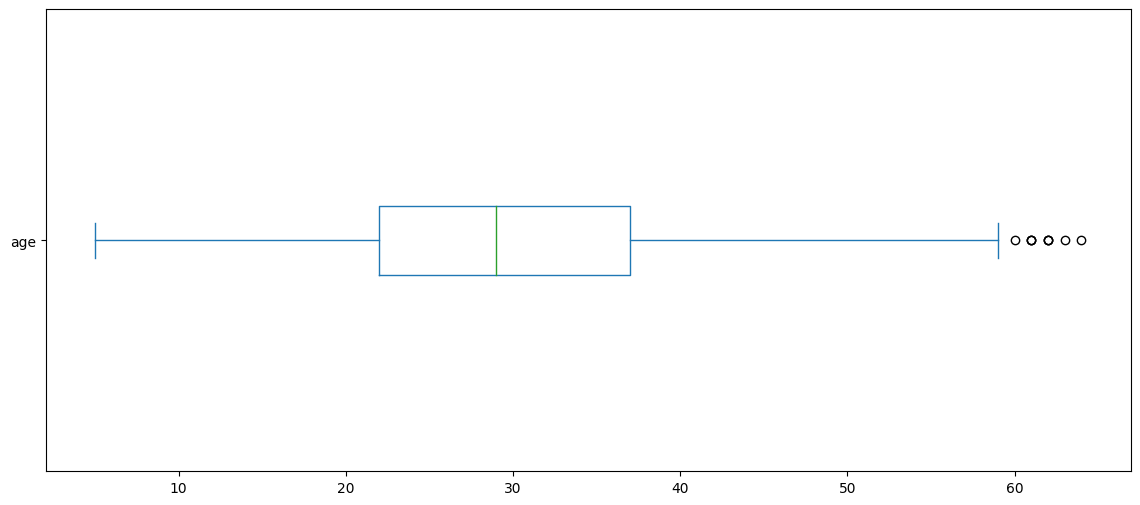

In [46]:
df['age'].plot(kind='box', vert=False, figsize=(14,6))

<Axes: >

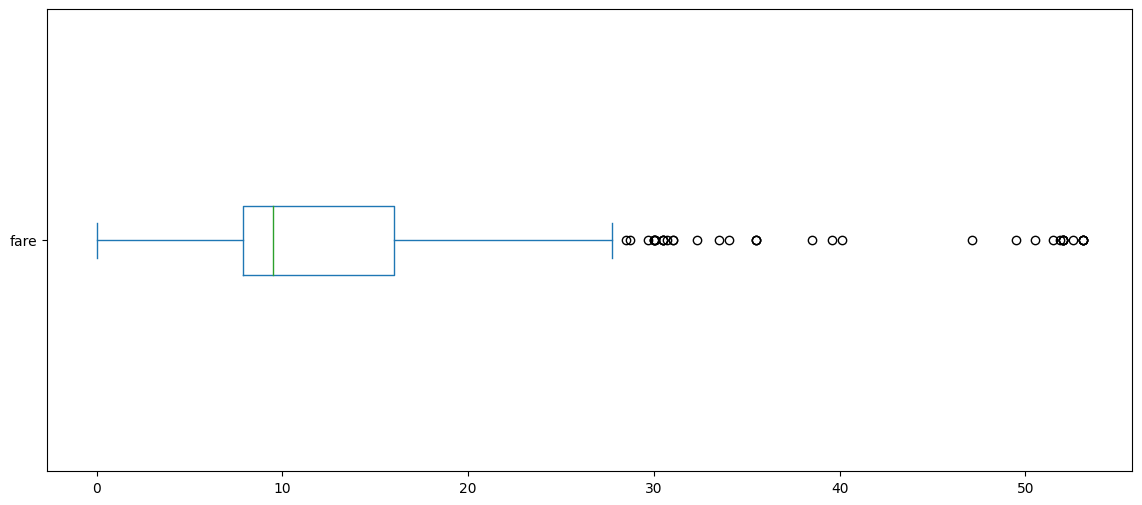

In [47]:
df['fare'].plot(kind='box', vert=False, figsize=(14,6))

In [48]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

In [49]:
for column_name in df.columns:
  if df.dtypes[column_name] == 'object':
    continue

  df = remove_outliers(df, column_name)

<Axes: >

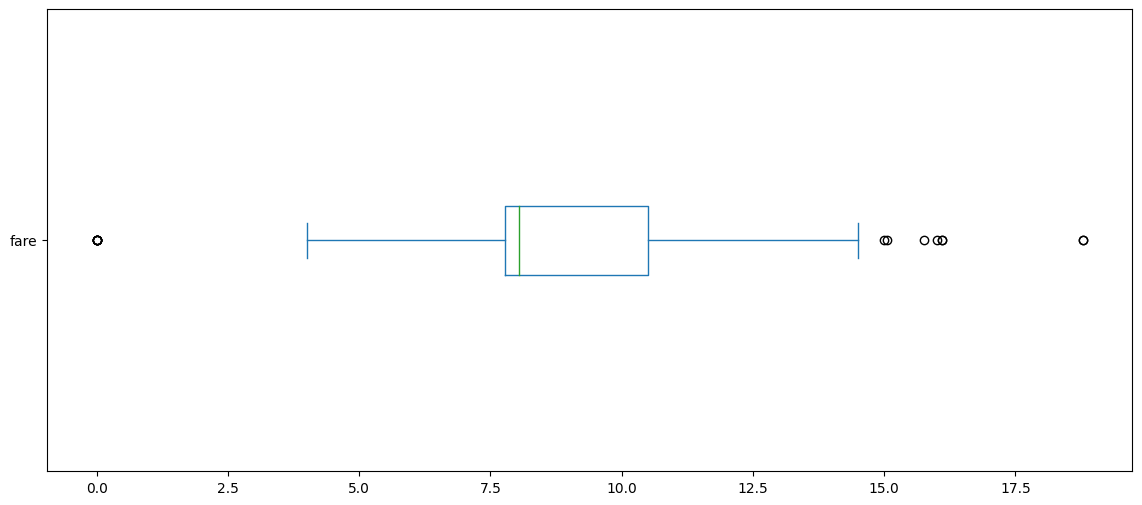

In [50]:
df['fare'].plot(kind='box', vert=False, figsize=(14,6))

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 2 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    298 non-null    object 
 1   sex       298 non-null    object 
 2   age       298 non-null    float64
 3   sibsp     298 non-null    int64  
 4   parch     298 non-null    int64  
 5   fare      298 non-null    float64
 6   embarked  298 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.6+ KB


In [52]:
num_columns = df.select_dtypes(include='number').columns

(array([1, 2]), [Text(1, 0, 'female'), Text(2, 0, 'male')])

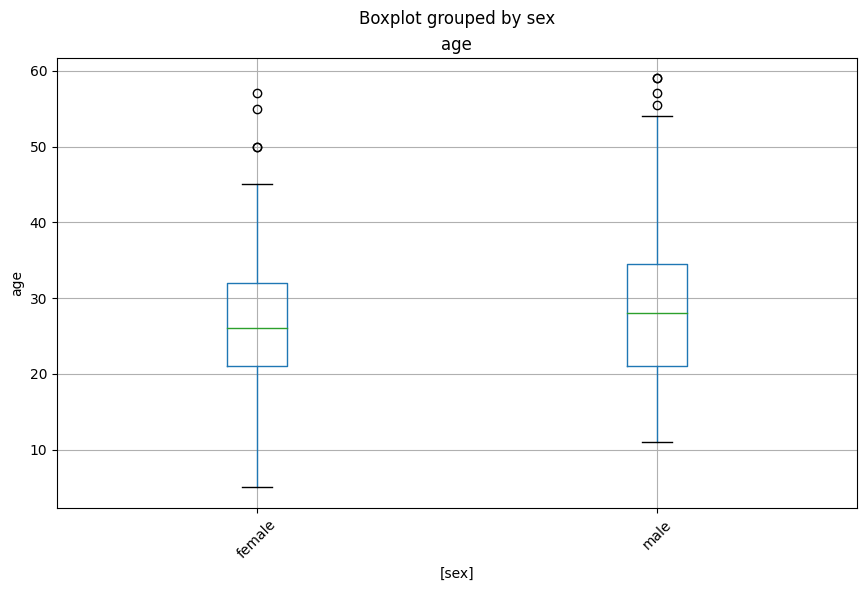

In [53]:
ax = df[['age', 'sex']].boxplot(by='sex', figsize=(10,6))
ax.set_ylabel('age')
plt.xticks(rotation=45)

в віковому діапазоні чоловіків більше

(array([1, 2]), [Text(1, 0, 'female'), Text(2, 0, 'male')])

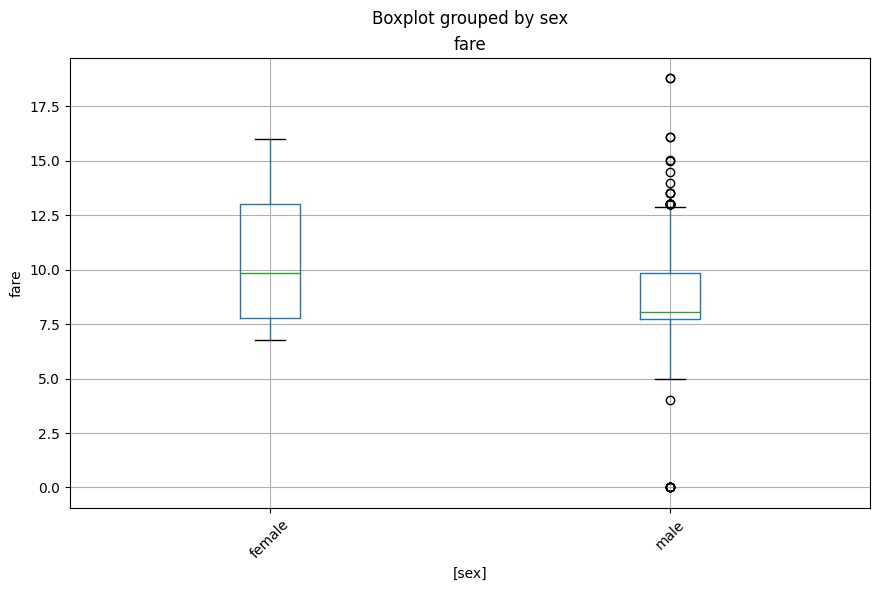

In [54]:
ax = df[['fare', 'sex']].boxplot(by='sex', figsize=(10,6))
ax.set_ylabel('fare')
plt.xticks(rotation=45)

Жінки оплачують більше, ніж чоловіки

<ipython-input-55-820d4eb7f8cd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cleaned.corr(method='pearson')


,age,fare
age,1.000000,0.084298
fare,0.084298,1.000000


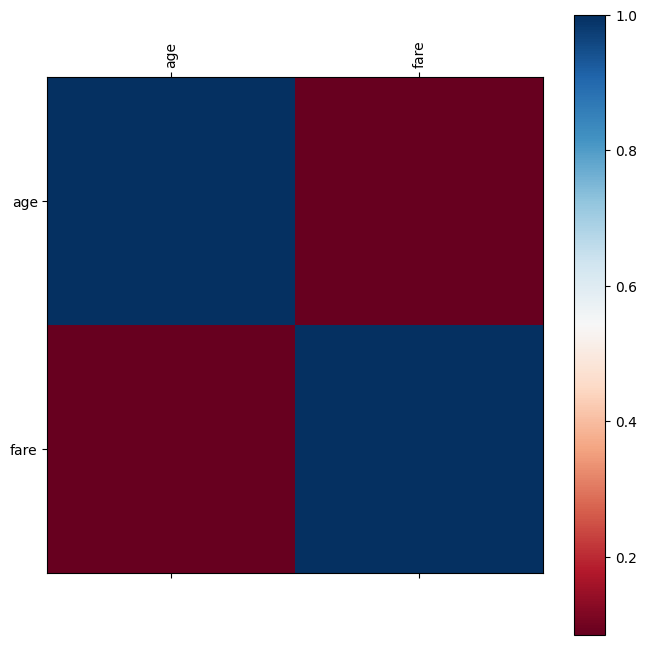

In [55]:
df_cleaned = df.drop(['sibsp', 'parch'], axis=1)

corr = df_cleaned.corr(method='pearson')


fig = plt.figure(figsize=(8, 8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

corr

<Axes: xlabel='fare', ylabel='age'>

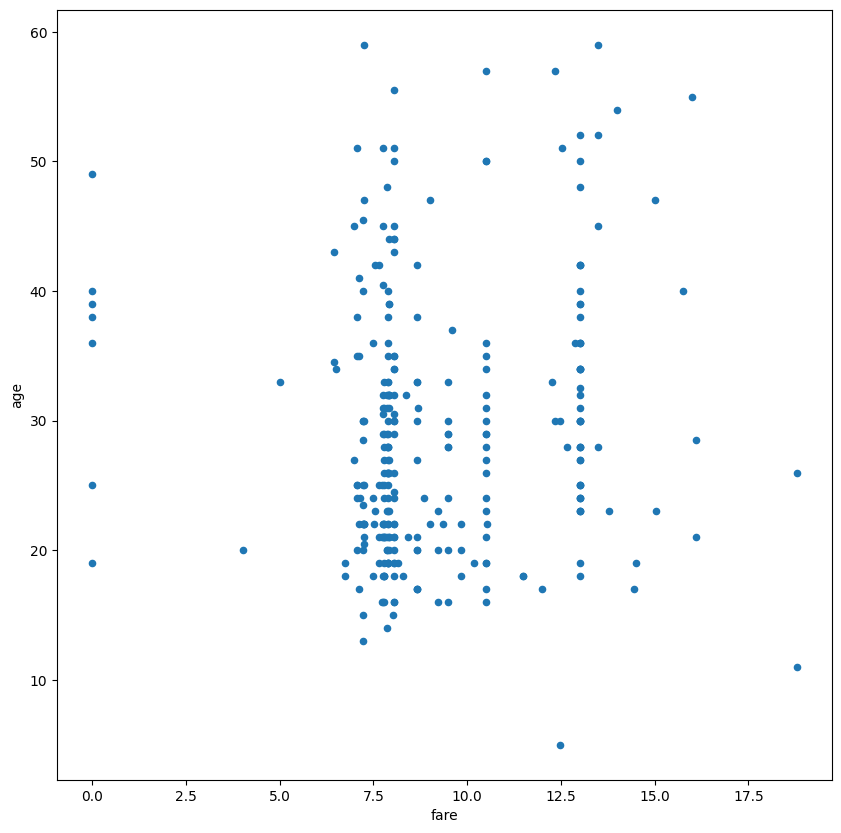

In [56]:
df.plot(kind='scatter', x='fare', y='age', figsize=(10,10))

кореляція не відома

(array([1, 2]), [Text(1, 0, 'female'), Text(2, 0, 'male')])

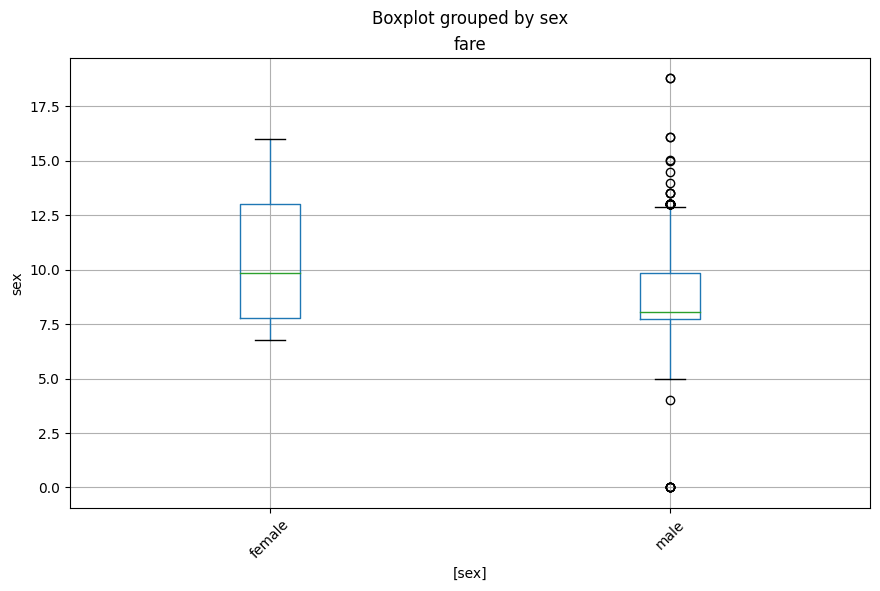

In [57]:
ax = df[['fare', 'sex']].boxplot(by='sex', figsize=(10,6))
ax.set_ylabel('sex')
plt.xticks(rotation=45)

(array([1, 2, 3]), [Text(1, 0, 'C'), Text(2, 0, 'Q'), Text(3, 0, 'S')])

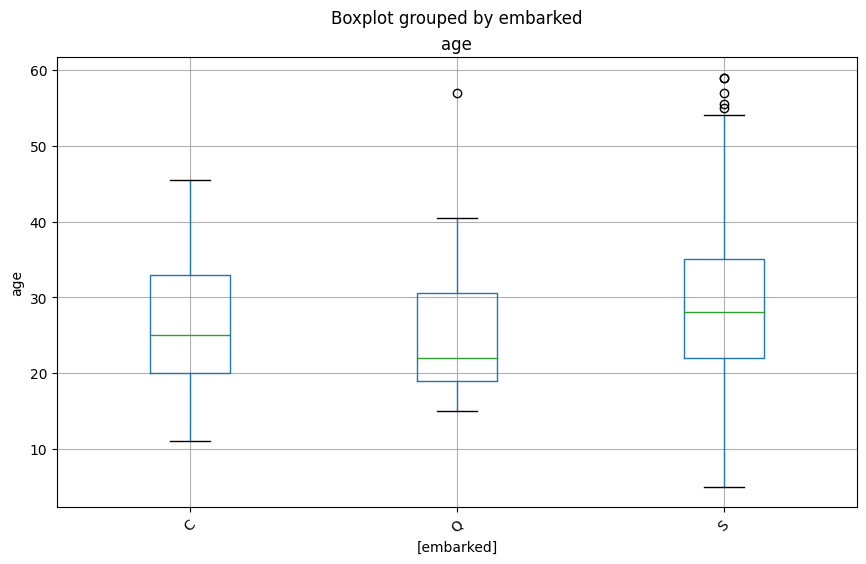

In [60]:
ax = df[['embarked', 'age']].boxplot(by='embarked', figsize=(10,6))
ax.set_ylabel('age')
plt.xticks(rotation=45)

наймолодші люди з Q
найстарші з S

(array([1, 2, 3]),
 [Text(1, 0, 'другий'), Text(2, 0, 'перший'), Text(3, 0, 'третій')])

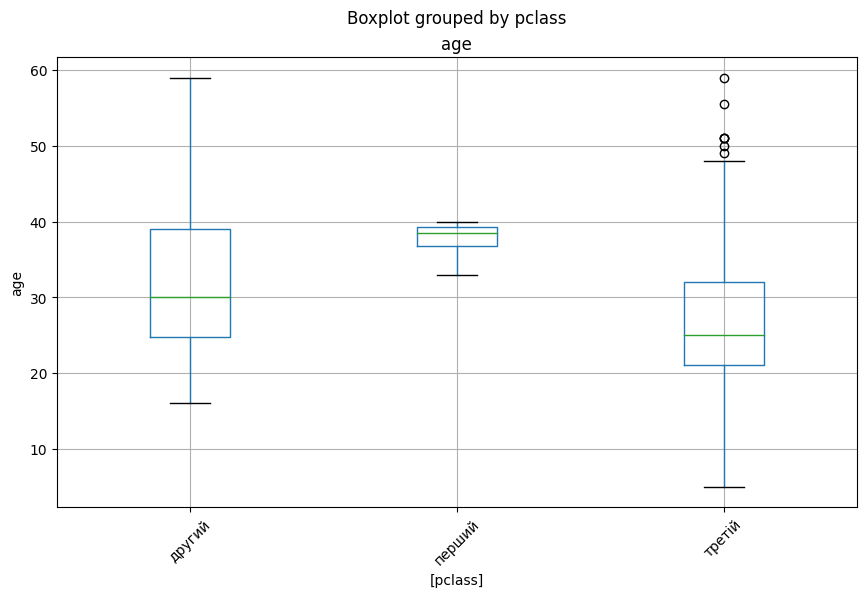

In [61]:
ax = df[['pclass', 'age']].boxplot(by='pclass', figsize=(10,6))
ax.set_ylabel('age')
plt.xticks(rotation=45)

чим старша людина, тим комфортабніший клас вона купує